In [1]:
import battleship as ship
import genetic_algorithm as ga

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# Setting Up the Board

Correct number of pieces on board
0000111001000000000100000000010000111001000000000100110000000000100000000010000000001000000000100000


Text(0.5, 1.0, 'Battleship Board')

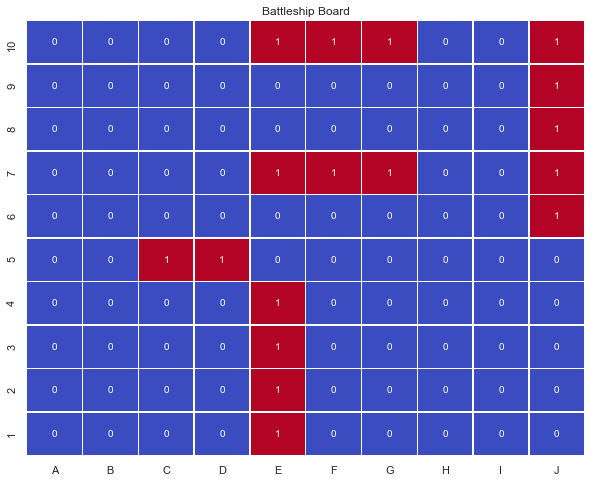

In [2]:
#create a new board and solution
board, solution = ship.new_board()

# print the genetic solution
print(solution)

# add the board to a dataframe for plotting
df = pd.DataFrame(board, columns=['A','B','C','D','E','F','G','H','I','J',])
df['ylabel'] = range(10,0,-1)
df = df.set_index('ylabel')

# print the board using a heatmap
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
sns.heatmap(df, cmap='coolwarm', linewidths=0.5, annot=True, cbar=False)
ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_title('Battleship Board')

# Generating Random Guesses of the Entire Board

Text(0.5, 1.0, 'Battleship Board')

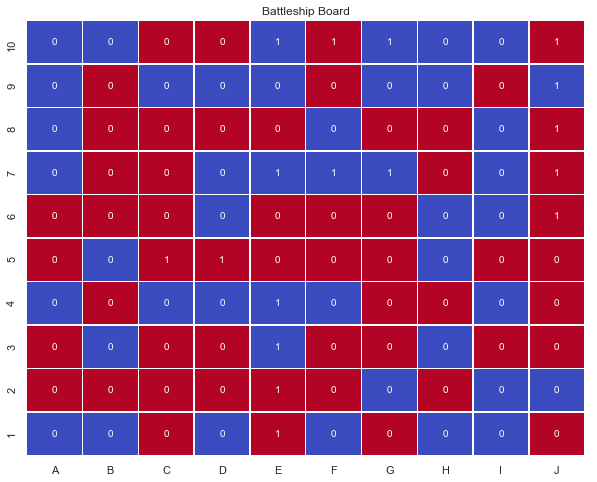

In [55]:
# create a random guess
rand_sol = np.random.randint(2, size=100).reshape((10, 10))
rand_sol

# overlay a random guess on the board using a heatmap
rand_df = pd.DataFrame(rand_sol, columns=['A','B','C','D','E','F','G','H','I','J',])
rand_df['ylabel'] = range(10,0,-1)
rand_df = rand_df.set_index('ylabel')

# print the random guess on the board using a heatmap
fig, ay = plt.subplots(1, 1, figsize = (10, 8))
sns.heatmap(rand_df, cmap='coolwarm', linewidths=0.5, annot=board, cbar=False)
ay.set_ylabel('')    
ay.set_xlabel('')
ay.set_title('Battleship Board')

Accuracy: 0.49


Text(0.5, 1.0, 'Battleship Board')

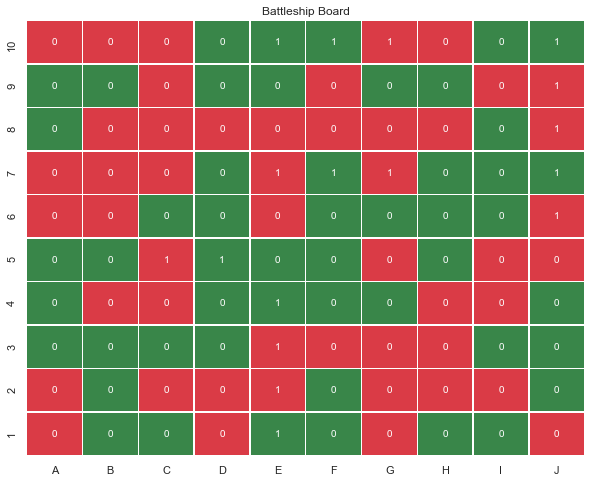

In [54]:
# show accuracy
# rand_sol_str = ''.join(str(x) for x in list(rand_sol.flatten()))
gene_matches = []
n_gene_matches = 0
    
for i in range(len(solution)):
    if solution[i] == rand_sol_str[i]:
        n_gene_matches += 1
        gene_matches.append(1)
    else:
        gene_matches.append(0)
            
accuracy = n_gene_matches / len(solution)
print('Accuracy: ' + str(accuracy))

# 
gene_matches_arr = np.array(gene_matches).reshape((10, 10))

# overlay a random guess on the board using a heatmap
rand_df = pd.DataFrame(gene_matches_arr, columns=['A','B','C','D','E','F','G','H','I','J',])
rand_df['ylabel'] = range(10,0,-1)
rand_df = rand_df.set_index('ylabel')

# print the random guess on the board using a heatmap
fig, ay = plt.subplots(1, 1, figsize = (10, 8))
rg = sns.diverging_palette(133, 10, as_cmap=True)
sns.heatmap(rand_df, cmap=rg, linewidths=0.5, annot=board, cbar=False)
ay.set_ylabel('')    
ay.set_xlabel('')
ay.set_title('Battleship Board')

# Creating Descendent Generations

In [3]:
# initialize the first random generation
generation_size = 10
gene_pool = ga.random_generation(generation_size, 100)

# compare fitness
gene_pool['Fitness'] = gene_pool.apply(lambda row: ship.accuracy(row.Chromosome, solution), axis=1)

# assign elites with elite rate
elite_rate = 0.20
gene_pool = ga.assign_elites(gene_pool, elite_rate)

# create successive generations until termination criteria is met
gene_pool = ga.create_descendents(gene_pool, elite_rate, solution, 1.0)
gene_pool = gene_pool.set_index('Sequence')

1: 0.54
2: 0.59
3: 0.61
4: 0.62
5: 0.63
6: 0.65
7: 0.67
8: 0.67
9: 0.67
10: 0.67
11: 0.68
12: 0.69
13: 0.69
14: 0.7
15: 0.7
16: 0.71
17: 0.71
18: 0.71
19: 0.73
20: 0.74
21: 0.74
22: 0.74
23: 0.74
24: 0.75
25: 0.75
26: 0.75
27: 0.75
28: 0.77
29: 0.77
30: 0.77
31: 0.78
32: 0.78
33: 0.78
34: 0.78
35: 0.78
36: 0.78
37: 0.79
38: 0.8
39: 0.81
40: 0.81
41: 0.81
42: 0.81
43: 0.82
44: 0.83
45: 0.83
46: 0.83
47: 0.83
48: 0.83
49: 0.83
50: 0.84
51: 0.85
52: 0.86
53: 0.87
54: 0.88
55: 0.88
56: 0.88
57: 0.88
58: 0.88
59: 0.88
60: 0.89
61: 0.89
62: 0.89
63: 0.89
64: 0.89
65: 0.89
66: 0.89
67: 0.89
68: 0.89
69: 0.89
70: 0.89
71: 0.89
72: 0.89
73: 0.89
74: 0.9
75: 0.9
76: 0.9
77: 0.9
78: 0.91
79: 0.91
80: 0.91
81: 0.91
82: 0.91
83: 0.91
84: 0.91
85: 0.91
86: 0.93
87: 0.93
88: 0.93
89: 0.93
90: 0.93
91: 0.93
92: 0.93
93: 0.93
94: 0.94
95: 0.94
96: 0.94
97: 0.94
98: 0.95
99: 0.95
100: 0.95
101: 0.95
102: 0.95
103: 0.95
104: 0.95
105: 0.95
106: 0.95
107: 0.95
108: 0.95
109: 0.95
110: 0.95
111: 0.95
112: 

In [12]:
# show the first generation
gene_pool.head(generation_size)

,Chromosome,Generation,Birth,Fitness,Parents,Elite
Sequence,,,,,,
7,1011000101001010010111101110110001110001000011...,1,Random,0.54,0,True
8,0001111000010110110001011101000001100011001111...,1,Random,0.54,0,True
3,0010000111110111100110101100110010101101100001...,1,Random,0.53,0,False
10,1000110110100110110011000101000100111111010001...,1,Random,0.52,0,False
6,0111101111100110110100001011001110110001111000...,1,Random,0.50,0,False
5,0101001100110001100001001001010010001110110010...,1,Random,0.49,0,False
1,0111100011111011010000010001011010000111111100...,1,Random,0.48,0,False
2,1111011011010110010111110101000110010001010111...,1,Random,0.44,0,False
4,0100010111110010111000110101100000100010010111...,1,Random,0.42,0,False


In [16]:
# show the second generation
gene_pool.iloc[10:20]

,Chromosome,Generation,Birth,Fitness,Parents,Elite
Sequence,,,,,,
13,0001111101001010010111101110110001110001000011...,2,Splice Pair,0.59,"[11, 12]",True
11,1011000101001010010111101110110001110001000011...,2,Elitism,0.54,7,True
12,0001111000010110110001011101000001100011001111...,2,Elitism,0.54,8,False
14,1011000101001010011111101110110001110001000001...,2,Mutation,0.54,11,False
15,0001111000010110110001011101000001100011001111...,2,Mutation,0.54,12,False
16,0001111000010110110001011101000001100011001111...,2,Mutation,0.54,12,False
17,1011000101001010010111101110110001110001000011...,2,Mutation,0.54,11,False
19,1011000101001010010111101110110001110001000011...,2,Mutation,0.54,11,False
18,1011000101001010011111101110110001110001000011...,2,Mutation,0.52,11,False


In [13]:
# show the last generation
gene_pool.tail(generation_size)

,Chromosome,Generation,Birth,Fitness,Parents,Elite
Sequence,,,,,,
1897,0000111001000000000100000000010000111001000000...,211,Mutation,1.00,1893,True
1892,0000111001000000000100000000010000111001000000...,211,Elitism,0.99,1883,True
1893,0000111001000000000100000000010000111001000000...,211,Elitism,0.99,1884,False
1894,0000111001000000000100000000010000111001000000...,211,Splice Pair,0.99,"[1892, 1893]",False
1894,0000111001000000000100000000010000111001000000...,211,Splice Pair,0.99,"[1892, 1893]",False
1895,0000111001000000000100000000010000111001000000...,211,Mutation,0.99,1892,False
1896,0000111001000000000100100000010000111001000000...,211,Mutation,0.98,1893,False
1900,0000111001000000000100000000010000111001000000...,211,Mutation,0.98,1893,False
1898,0000111001000000000100000000010000111001000000...,211,Mutation,0.97,1893,False


In [14]:
# show the fitness stats of the first 10 generations
gene_pool_stats = gene_pool.groupby('Generation').describe()
gene_pool_stats.head(10)

Fitness                                                    
             count   mean       std   min     25%    50%     75%   max
Generation                                                            
1             10.0  0.486  0.050596  0.40  0.4500  0.495  0.5275  0.54
2             10.0  0.538  0.024404  0.49  0.5400  0.540  0.5400  0.59
3             10.0  0.575  0.031002  0.53  0.5425  0.590  0.6000  0.61
4             10.0  0.602  0.011353  0.58  0.6000  0.600  0.6100  0.62
5             10.0  0.614  0.010750  0.60  0.6100  0.610  0.6200  0.63
6             10.0  0.627  0.014181  0.60  0.6225  0.630  0.6300  0.65
7             10.0  0.646  0.010750  0.63  0.6400  0.645  0.6500  0.67
8             10.0  0.652  0.013166  0.64  0.6400  0.650  0.6650  0.67
9             10.0  0.668  0.004216  0.66  0.6700  0.670  0.6700  0.67
10            10.0  0.669  0.003162  0.66  0.6700  0.670  0.6700  0.67

# Converging to the Genetic Solution

In [15]:
# show the fitness stats of the last 10 generations
gene_pool_stats.tail(10)

Fitness                                                  
             count   mean       std   min     25%    50%   75%   max
Generation                                                          
202           10.0  0.978  0.015492  0.94  0.9725  0.980  0.99  0.99
203           10.0  0.987  0.006749  0.97  0.9900  0.990  0.99  0.99
204           10.0  0.986  0.005164  0.98  0.9800  0.990  0.99  0.99
205           10.0  0.981  0.009944  0.96  0.9800  0.980  0.99  0.99
206           10.0  0.983  0.010593  0.96  0.9800  0.990  0.99  0.99
207           10.0  0.979  0.017288  0.94  0.9725  0.990  0.99  0.99
208           10.0  0.985  0.007071  0.97  0.9800  0.990  0.99  0.99
209           10.0  0.984  0.006992  0.97  0.9800  0.985  0.99  0.99
210           10.0  0.978  0.012293  0.96  0.9700  0.980  0.99  0.99
211           10.0  0.984  0.011738  0.96  0.9800  0.990  0.99  1.00

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Gene Pool Statistics')

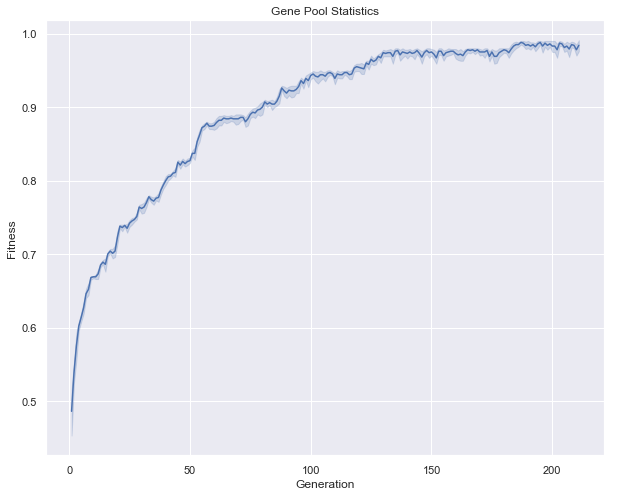

In [7]:
# show the convergence of the gene pool
fig, ay = plt.subplots(1, 1, figsize = (10, 8))
ay = sns.lineplot(x="Generation", y="Fitness", data=gene_pool)
ay.set_title('Gene Pool Statistics')

# Tuning the Model Parameters